In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
import string
from collections import Counter

In [2]:
file = pd.read_csv("dataset\spam.csv", encoding='ISO-8859-1')

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Computer's World\AppData\Local\Temp\ipykernel_5052\3899250890.py:1: SyntaxWarning: invalid escape sequence '\s'
  file = pd.read_csv("dataset\spam.csv", encoding='ISO-8859-1')


In [3]:
file.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
file.shape

(5572, 5)

Steps to be performed
1. Data Cleaning
2. EDA 
3. text Preprocessing 
4. Model building 
5. Evaluation
6. Improvement
7. Website building
8. Deployement


## 1.Data cleaning

In [5]:
file.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


we will drop last three columns because of low value

In [6]:
file.drop(columns=["Unnamed: 2","Unnamed: 3", "Unnamed: 4"] ,inplace=True)

In [7]:
file.sample(5)

,v1,v2
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
4057,ham,Hi di is yijue we're meeting at 7 pm at esapla...
4359,ham,"Night sweet, sleep well! I've just been to see..."
1120,ham,Cancel cheyyamo?and get some money back?
5358,ham,Hmm. Shall i bring a bottle of wine to keep us...


In [8]:
 #renamr the cols
file.rename(columns={"v1":"target","v2":"text"},inplace=True)
file.sample(5)

,target,text
1566,ham,I am late. I will be there at
2564,ham,"Under the sea, there lays a rock. In the rock,..."
628,spam,New TEXTBUDDY Chat 2 horny guys in ur area 4 j...
4794,ham,Saw Guys and Dolls last night with Patrick Swa...
5497,spam,"SMS SERVICES. for your inclusive text credits,..."


In [9]:
encoder = LabelEncoder()

In [10]:
#converting text of ham and spam into 0 and 1
file["target"]= encoder.fit_transform(file['target'])

In [11]:
file.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#check missing values
file.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#check for duplicated values
file.duplicated().sum()

403

In [14]:
#droping duplicated values
file=file.drop_duplicates(keep="first")

In [15]:
file.shape

(5169, 2)

## 2. EDA 

First we need to check the percentage sms are ham or spam 

In [16]:
file["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1cc77cc0b30>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

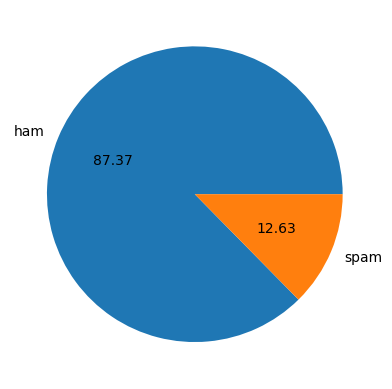

In [17]:
plt.pie(file["target"].value_counts(), labels=['ham', 'spam'],autopct='%0.2f')

Above from pie we can conclude our data is imbalance 

In [18]:
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to C:\Users\Computer's
[nltk_data]     World\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Computer's
[nltk_data]     World\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
#counting number of characters
file['num_characters'] = file['text'].apply(len)


In [20]:
file.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
file['num_words']=file['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
file.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
file['num_sentences']=file['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
file.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
file[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
#output for ham messages
file[file['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#output for spam messages
file[file['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


## Plotting 

<Axes: xlabel='num_characters', ylabel='Count'>

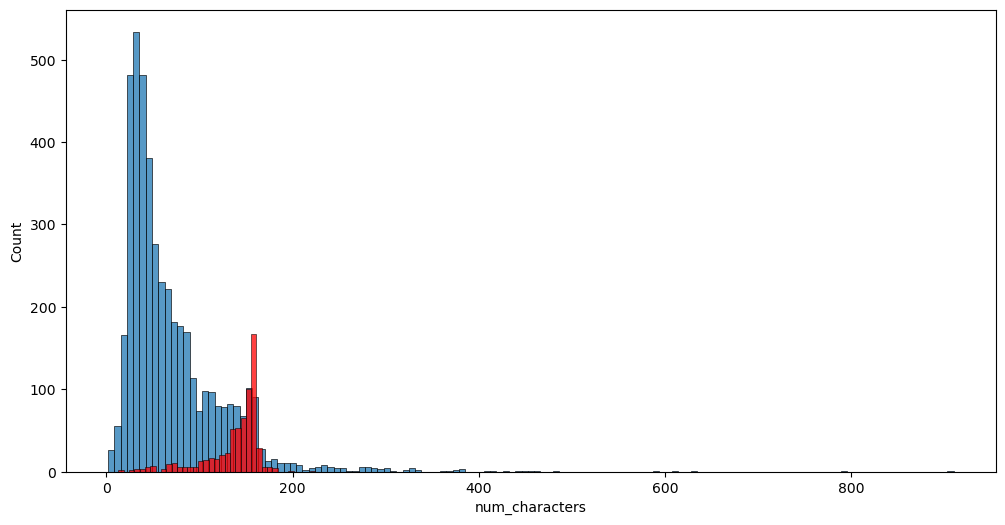

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(file[file['target'] == 0]['num_characters'])
sns.histplot(file[file['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

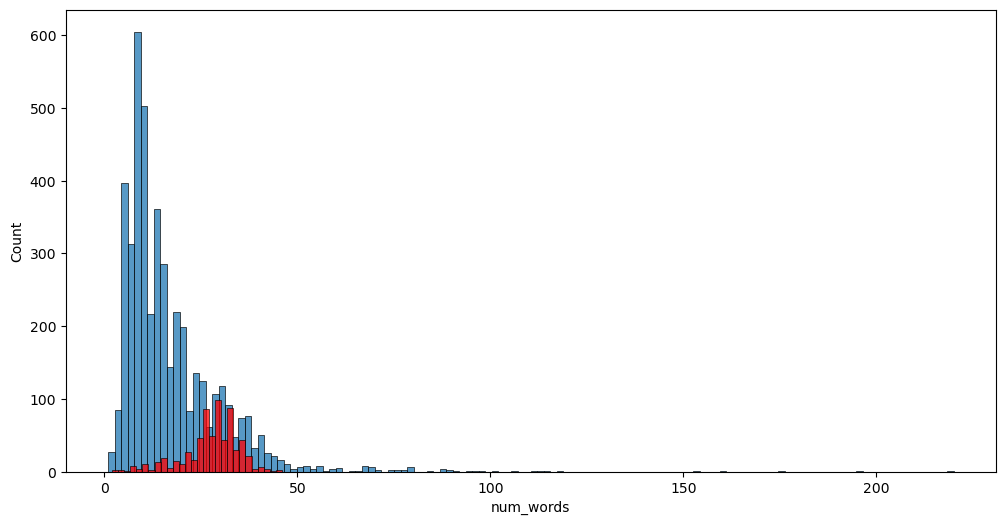

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(file[file['target'] == 0]['num_words'])
sns.histplot(file[file['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

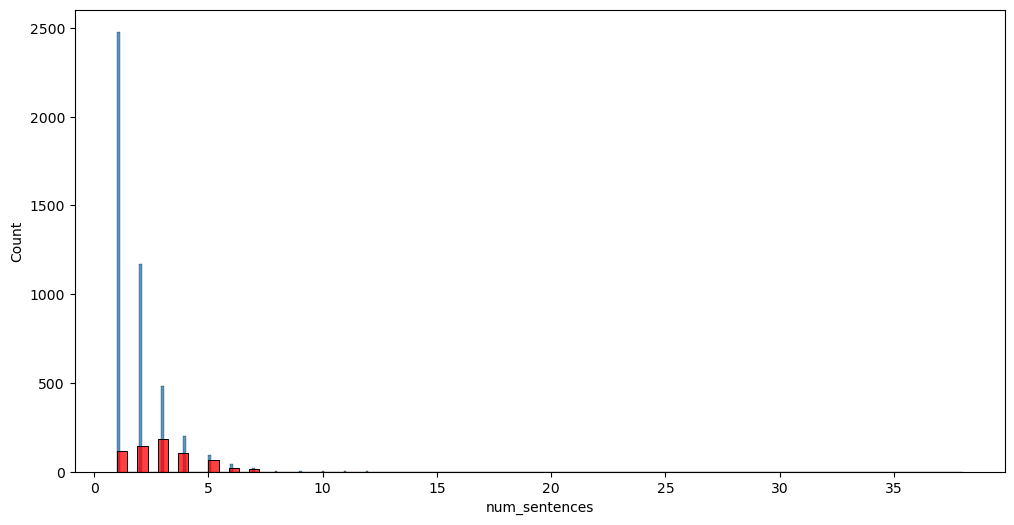

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(file[file['target'] == 0]['num_sentences'])
sns.histplot(file[file['target'] == 1]['num_sentences'],color='red')

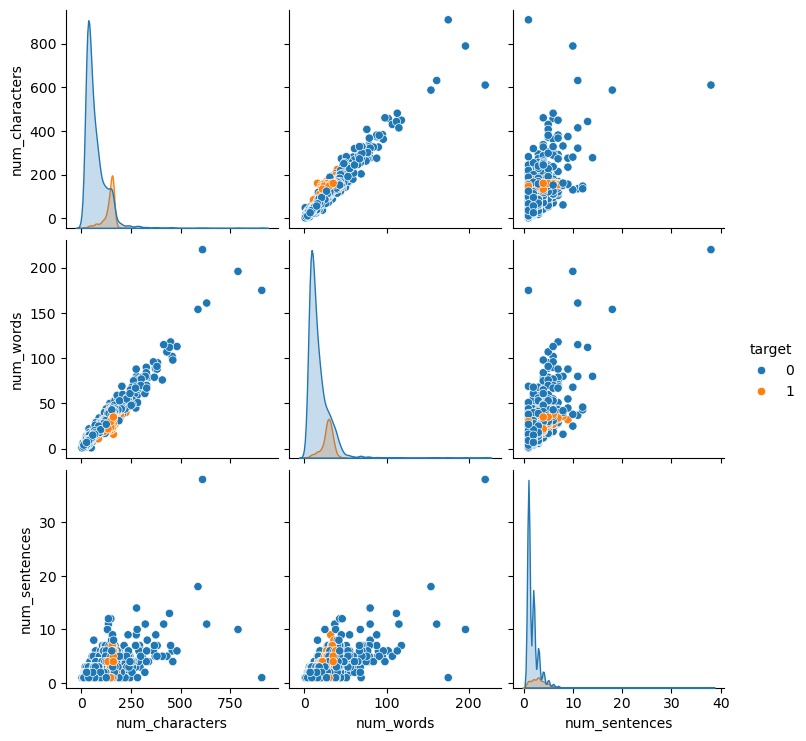

In [31]:
#we need to  understand coorelation between coloumns
sns.pairplot(file,hue='target')

<Axes: >

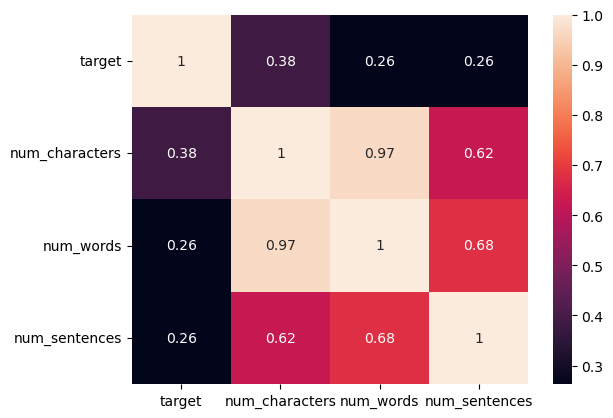

In [32]:
sns.heatmap(file.corr(numeric_only=True),annot=True)

## 3. Data Preprocessing
* Lower case
* Tokenization
* Remove special characters
* Remove stop words and punctuation
* Stemming

In [33]:
ps= PorterStemmer()


In [34]:
def transfrom_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)

    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i) 

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i) )             
    
    return " ".join(y)

In [35]:
transfrom_text('hi how are  %% you abubaker did you like machine learning!!')

'hi abubak like machin learn'

In [36]:
file['transformed_text'] = file['text'].apply(transfrom_text) 

In [37]:
file.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [39]:
spam_wc = wc.generate(file[file["target"]==1]['transformed_text'].str.cat(sep=" "))

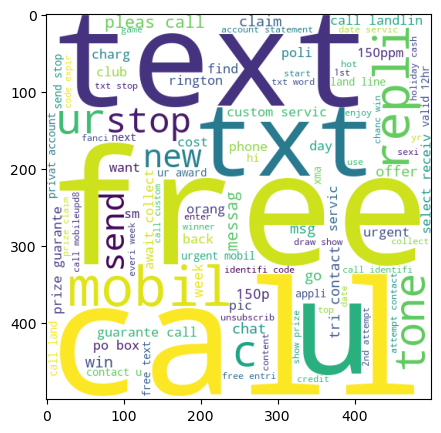

In [40]:
plt.figure(figsize=(10,5))
plt.imshow(spam_wc)

In [41]:
ham_wc = wc.generate(file[file["target"]==0]['transformed_text'].str.cat(sep=" "))

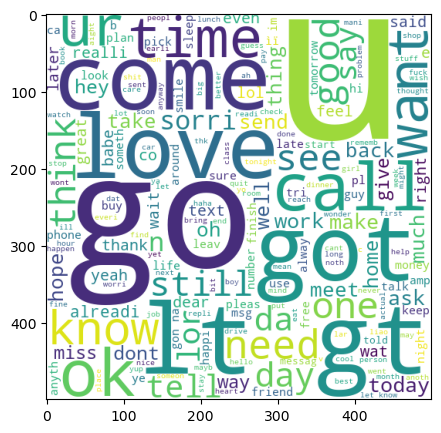

In [42]:
plt.figure(figsize=(10,5))
plt.imshow(spam_wc)

In [43]:
file.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [44]:
spam_corpus = []
for msg in file[file["target"]==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [45]:
len(spam_corpus)

9939

In [47]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

## Model Building
# we start builidng with naive bayes mode

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [50]:
X = cv.fit_transform(file['transformed_text']).toarray()

In [51]:
X.shape

(5169, 6708)

In [52]:
y = file['target'].values

In [53]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [59]:
gnb = GaussianNB
mng = MultinomialNB
bnb = BernoulliNB

In [61]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


AttributeError: 'numpy.ndarray' object has no attribute '_validate_params'